# Lake Effect

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Chicago_skyline_kz01.jpg/640px-Chicago_skyline_kz01.jpg' width = 600>

__How does the lake affect temperatures in the city?__ 

You have access to 3 data sets:
1. A list of all of the nodes: `nodes.csv`
2. A snapshot of temperature readings for July 18, 2019 at about 3pm: `July18_2019.csv`
3. A series of latitude and longitude reference points for the lakeshore: `Chicago_Lakefront.csv`


<img src = "../images/Doing_Science_with_AoT/lake_effect_map.jpg"  width = 800>

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
plt.style.use('seaborn')

## Task: Explore the data provided and pseudocode a method to determine if distance from the lake is correlated to temperature.

#### Explore the Data

In [2]:
nodes = pd.read_csv("../data/Nodes.csv")
nodes.head()

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp
0,001e0610ba46,AoT_Chicago,4,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],10/9/17 0:00,NaN
1,001e0610ba3b,AoT_Chicago,6,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),8/8/17 0:00,NaN
2,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),8/8/17 0:00,NaN
3,001e0610ba16,AoT_Chicago,10,Homan Ave & Roosevelt Rd Chicago IL,41.866349,-87.710543,AoT Chicago (S) [C],7/18/18 0:00,NaN
4,001e0610ba8b,AoT_Chicago,18,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2/26/18 0:00,NaN


In [3]:
lakefront = pd.read_csv('../data/Chicago_Lakefront.csv')
lakefront.head()

,Longitude,Latitude
0,-87.51521,41.70685
1,-87.52095,41.71174
2,-87.52611,41.71114
3,-87.52819,41.71635
4,-87.52916,41.73006


In [4]:
temperatures = pd.read_csv("../data/July18_2019.csv")
temperatures.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,2019/07/18 14:00:00,001e0610ee36,metsense,pr103j2,temperature,840,24.45
1,2019/07/18 14:00:00,001e06114fd4,metsense,pr103j2,temperature,839,24.30
2,2019/07/18 14:00:01,001e0610ba13,metsense,pr103j2,temperature,853,26.45
3,2019/07/18 14:00:02,001e0610ee61,metsense,pr103j2,temperature,850,26.00
4,2019/07/18 14:00:02,001e06113ad8,metsense,pr103j2,temperature,837,24.00


## Calculate the **closest** distance from each node to the lakeshore:

<img src = "../images/Doing_Science_with_AoT/Slide8.jpeg"  width = 800>

Create 2 empty columns. This is where we will put our calculated distances between each node and the shore.

In [5]:
lakefront['distance'] = np.nan       # Distance from a particular node to each lakefront point
nodes['lake_distance'] = np.nan      # Distance from the node to the nearest lakefront point

#### 1. Get the lat and long of the first node:

<img src = "../images/Doing_Science_with_AoT/Slide10.jpeg"  width = 800>

In [6]:
node_lon = abs(nodes['lon'].iloc[0])
print(node_lon)
node_lat = abs(nodes['lat'].iloc[0])
print(node_lat)

87.627678
41.878377


#### 2. Get the latitude and longitude distances from the node to the first lakeshore point:

<img src = "../images/Doing_Science_with_AoT/Slide14.jpeg"  width = 800>

In [7]:
lon_diff = node_lon - abs(lakefront['Longitude'].iloc[0])
print(lon_diff)
lat_diff = node_lat - abs(lakefront['Latitude'].iloc[0])
print(lat_diff)

0.1124680000000069
0.17152699999999754


#### 3. Calculate the straight-line distance from the node to the first lakeshore point:

<img src = "../images/Doing_Science_with_AoT/Slide16.jpeg"  width = 800>

In [8]:
distance_to_lake = np.sqrt(lon_diff ** 2 + lat_diff ** 2)
print(distance_to_lake)

0.20511109856124488


#### 4. Store this distance to the `lakefront` dataframe:

In [9]:
lakefront['distance'].iloc[0] = distance_to_lake
lakefront.head()

,Longitude,Latitude,distance
0,-87.51521,41.70685,0.205111
1,-87.52095,41.71174,NaN
2,-87.52611,41.71114,NaN
3,-87.52819,41.71635,NaN
4,-87.52916,41.73006,NaN


#### 5. Repeat for the next lakeshore marker:

<img src = "../images/Doing_Science_with_AoT/Slide22.jpeg"  width = 800>

In [10]:
node_lon = abs(nodes['lon'].iloc[1])
node_lat = abs(nodes['lat'].iloc[1])
lon_diff = node_lon - abs(lakefront['Longitude'].iloc[1])
lat_diff = node_lat - abs(lakefront['Latitude'].iloc[1])
distance_to_lake = np.sqrt(lon_diff ** 2 + lat_diff ** 2)
lakefront['distance'].iloc[1] = distance_to_lake
lakefront.head()

,Longitude,Latitude,distance
0,-87.51521,41.70685,0.205111
1,-87.52095,41.71174,0.174576
2,-87.52611,41.71114,NaN
3,-87.52819,41.71635,NaN
4,-87.52916,41.73006,NaN


#### 6. Repeat for all the lakeshore markers.

<img src = "../images/Doing_Science_with_AoT/Slide23.jpeg"  width = 800>

In [11]:
# Reset node_lon and node_lat values to implement loop:
node_lon = abs(nodes['lon'].iloc[0])
node_lat = abs(nodes['lat'].iloc[0])

In [12]:
for j in range (len(lakefront)):
    lon_diff = node_lon - abs(lakefront['Longitude'].iloc[j])
    lat_diff = node_lat - abs(lakefront['Latitude'].iloc[j])
    distance_to_lake = np.sqrt(lon_diff ** 2 + lat_diff ** 2)
    lakefront['distance'].iloc[j] = distance_to_lake 

In [13]:
lakefront

,Longitude,Latitude,distance
0,-87.51521,41.70685,0.205111
1,-87.52095,41.71174,0.197886
2,-87.52611,41.71114,0.195664
3,-87.52819,41.71635,0.190133
4,-87.52916,41.73006,0.178055
5,-87.52992,41.73324,0.174990
6,-87.52977,41.74265,0.167355
7,-87.53188,41.74830,0.161547
8,-87.53265,41.75173,0.158334
9,-87.54260,41.75534,0.149587


#### 7. Calculate the closest lakeshore marker to the node:

<img src = "../images/Doing_Science_with_AoT/Slide25.jpeg"  width = 800>

In [14]:
distance = lakefront['distance'].min()
nodes['lake_distance'].iloc[0] = distance

In [15]:
nodes.head()

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,lake_distance
0,001e0610ba46,AoT_Chicago,4,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],10/9/17 0:00,NaN,0.016218
1,001e0610ba3b,AoT_Chicago,6,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),8/8/17 0:00,NaN,NaN
2,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),8/8/17 0:00,NaN,NaN
3,001e0610ba16,AoT_Chicago,10,Homan Ave & Roosevelt Rd Chicago IL,41.866349,-87.710543,AoT Chicago (S) [C],7/18/18 0:00,NaN,NaN
4,001e0610ba8b,AoT_Chicago,18,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2/26/18 0:00,NaN,NaN


#### 8. Convert lat/long degrees to miles:

In [16]:
nodes['lake_distance'] = nodes['lake_distance'].apply(lambda x: x*69)

In [17]:
nodes.head()

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,lake_distance
0,001e0610ba46,AoT_Chicago,4,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],10/9/17 0:00,NaN,1.119032
1,001e0610ba3b,AoT_Chicago,6,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),8/8/17 0:00,NaN,NaN
2,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),8/8/17 0:00,NaN,NaN
3,001e0610ba16,AoT_Chicago,10,Homan Ave & Roosevelt Rd Chicago IL,41.866349,-87.710543,AoT Chicago (S) [C],7/18/18 0:00,NaN,NaN
4,001e0610ba8b,AoT_Chicago,18,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2/26/18 0:00,NaN,NaN


#### 9. Repeat for all other nodes:

In [18]:
for i in range (len(nodes)):
    node_lon = abs(nodes['lon'].iloc[i])
    node_lat = abs(nodes['lat'].iloc[i])
    for j in range (len(lakefront)):
        lon_diff = node_lon - abs(lakefront['Longitude'].iloc[j])
        lat_diff = node_lat - abs(lakefront['Latitude'].iloc[j])
        distance_to_lake = np.sqrt(lon_diff ** 2 + lat_diff ** 2)
        lakefront['distance'].iloc[j] = distance_to_lake 
    distance = lakefront['distance'].min()
    nodes['lake_distance'].iloc[i] = distance
nodes['lake_distance'] = nodes['lake_distance'].apply(lambda x: x*69)

In [19]:
nodes

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,lake_distance
0,001e0610ba46,AoT_Chicago,4,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],10/9/17 0:00,NaN,1.119032
1,001e0610ba3b,AoT_Chicago,6,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),8/8/17 0:00,NaN,0.119241
2,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),8/8/17 0:00,NaN,0.501058
3,001e0610ba16,AoT_Chicago,10,Homan Ave & Roosevelt Rd Chicago IL,41.866349,-87.710543,AoT Chicago (S) [C],7/18/18 0:00,NaN,6.662234
4,001e0610ba8b,AoT_Chicago,18,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2/26/18 0:00,NaN,1.041155
...,...,...,...,...,...,...,...,...,...,...
117,001e061183eb,AoT_Chicago,0BE,"""63rd St & Halsted Ave Chicago IL""",41.779889,-87.644777,AoT Chicago (S) [CP],5/16/19 0:00,NaN,4.419172
118,001e06117b41,AoT_Chicago,0BA,"""60th & Michigan Ave Chicago IL""",41.785715,-87.622214,AoT Chicago (S) [CP],5/16/19 0:00,NaN,2.976207
119,001e061183f5,AoT_Chicago,0BF,111th & Michigan Ave Chicago IL,41.692703,-87.621020,AoT Chicago (S) [CP],6/24/19 0:00,NaN,6.609822
120,001e061182a7,AoT_Chicago,0C0,111th & Vincennes Chicago IL,41.691803,-87.663723,AoT Chicago (S) [CP],6/24/19 0:00,NaN,8.905544


In [20]:
nodes['lake_distance'].describe()

count    122.000000
mean       3.864627
std        2.553650
min        0.119241
25%        1.686029
50%        3.561889
75%        5.170477
max       13.231529
Name: lake_distance, dtype: float64

## Is there a correlation between distance from the lake and temperature?

#### 1. Convert the temperatures to Farenhei:

In [21]:
temperatures.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,2019/07/18 14:00:00,001e0610ee36,metsense,pr103j2,temperature,840,24.45
1,2019/07/18 14:00:00,001e06114fd4,metsense,pr103j2,temperature,839,24.30
2,2019/07/18 14:00:01,001e0610ba13,metsense,pr103j2,temperature,853,26.45
3,2019/07/18 14:00:02,001e0610ee61,metsense,pr103j2,temperature,850,26.00
4,2019/07/18 14:00:02,001e06113ad8,metsense,pr103j2,temperature,837,24.00


In [22]:
temperatures['Temperature_F'] = temperatures['value_hrf'].apply(lambda x: x*(9/5) + 32)

In [23]:
temperatures.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf,Temperature_F
0,2019/07/18 14:00:00,001e0610ee36,metsense,pr103j2,temperature,840,24.45,76.01
1,2019/07/18 14:00:00,001e06114fd4,metsense,pr103j2,temperature,839,24.30,75.74
2,2019/07/18 14:00:01,001e0610ba13,metsense,pr103j2,temperature,853,26.45,79.61
3,2019/07/18 14:00:02,001e0610ee61,metsense,pr103j2,temperature,850,26.00,78.80
4,2019/07/18 14:00:02,001e06113ad8,metsense,pr103j2,temperature,837,24.00,75.20


In [24]:
temperatures.describe()

,value_raw,value_hrf,Temperature_F
count,41.000000,40.000000,40.000000
mean,818.780488,24.303750,75.746750
std,127.924687,2.003279,3.605902
min,24.000000,19.550000,67.190000
25%,833.000000,23.400000,74.120000
50%,840.000000,24.450000,76.010000
75%,845.000000,25.237500,77.427500
max,866.000000,28.650000,83.570000


There is definitely some variance in the temperatures accross the city, but is this related to how far a node is from the lake?

#### 2. Visualize

Is there a correlation between the distance from the lake and the temperature? The quickest way to visualize this is through a scatter plot.

A scatter plot is made by pairing an x and y value. In this case we want temperature and distance from the lake. However, these 2 variables are in different datasets. We also have the problem that there are 122 different nodes, but we only have temperatures for 40 of them. Therefore, we will only be able to make 40 pairs.

To do this, we need to find a connection between the 2 datasets. This is known as a "key" and will allow us to combine the 2 datasets. If a temperature and a distance have the same key, we can merge them to the same row.

__What should our key be?__

In [25]:
nodes.head()

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,lake_distance
0,001e0610ba46,AoT_Chicago,4,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],10/9/17 0:00,NaN,1.119032
1,001e0610ba3b,AoT_Chicago,6,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),8/8/17 0:00,NaN,0.119241
2,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),8/8/17 0:00,NaN,0.501058
3,001e0610ba16,AoT_Chicago,10,Homan Ave & Roosevelt Rd Chicago IL,41.866349,-87.710543,AoT Chicago (S) [C],7/18/18 0:00,NaN,6.662234
4,001e0610ba8b,AoT_Chicago,18,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2/26/18 0:00,NaN,1.041155


In [26]:
temperatures.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf,Temperature_F
0,2019/07/18 14:00:00,001e0610ee36,metsense,pr103j2,temperature,840,24.45,76.01
1,2019/07/18 14:00:00,001e06114fd4,metsense,pr103j2,temperature,839,24.30,75.74
2,2019/07/18 14:00:01,001e0610ba13,metsense,pr103j2,temperature,853,26.45,79.61
3,2019/07/18 14:00:02,001e0610ee61,metsense,pr103j2,temperature,850,26.00,78.80
4,2019/07/18 14:00:02,001e06113ad8,metsense,pr103j2,temperature,837,24.00,75.20


In [27]:
distance_temps = pd.merge(nodes, temperatures, on = 'node_id')

In [28]:
distance_temps.head()

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,lake_distance,timestamp,subsystem,sensor,parameter,value_raw,value_hrf,Temperature_F
0,001e0610ba46,AoT_Chicago,4,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],10/9/17 0:00,NaN,1.119032,2019/07/18 14:00:17,metsense,pr103j2,temperature,840,24.45,76.01
1,001e0610bc10,AoT_Chicago,01F,State St & 87th Chicago IL,41.736314,-87.624179,AoT Chicago (S) [C],2/22/18 0:00,NaN,4.894850,2019/07/18 14:00:13,metsense,pr103j2,temperature,809,20.10,68.18
2,001e0610bbf9,AoT_Chicago,20,Western Ave & 69th St Chicago IL,41.768319,-87.683396,AoT Chicago (S) [C],2/13/18 0:00,NaN,7.108067,2019/07/18 14:00:03,metsense,pr103j2,temperature,845,25.20,77.36
3,001e0610ba15,AoT_Chicago,02A,Jeffrey Ave & 95th St Chicago IL,41.722457,-87.575350,AoT Chicago (S) [C],2/22/18 0:00,NaN,3.202265,2019/07/18 14:00:04,metsense,pr103j2,temperature,24,NaN,NaN
4,001e0610ee61,AoT_Chicago,03F,Pulaski Rd & Madison St Chicago IL,41.880732,-87.725660,AoT Chicago (S),11/20/17 0:00,NaN,7.297088,2019/07/18 14:00:02,metsense,pr103j2,temperature,850,26.00,78.80


In [29]:
distance_temps

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,lake_distance,timestamp,subsystem,sensor,parameter,value_raw,value_hrf,Temperature_F
0,001e0610ba46,AoT_Chicago,4,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],10/9/17 0:00,NaN,1.119032,2019/07/18 14:00:17,metsense,pr103j2,temperature,840,24.45,76.01
1,001e0610bc10,AoT_Chicago,01F,State St & 87th Chicago IL,41.736314,-87.624179,AoT Chicago (S) [C],2/22/18 0:00,NaN,4.894850,2019/07/18 14:00:13,metsense,pr103j2,temperature,809,20.10,68.18
2,001e0610bbf9,AoT_Chicago,20,Western Ave & 69th St Chicago IL,41.768319,-87.683396,AoT Chicago (S) [C],2/13/18 0:00,NaN,7.108067,2019/07/18 14:00:03,metsense,pr103j2,temperature,845,25.20,77.36
3,001e0610ba15,AoT_Chicago,02A,Jeffrey Ave & 95th St Chicago IL,41.722457,-87.575350,AoT Chicago (S) [C],2/22/18 0:00,NaN,3.202265,2019/07/18 14:00:04,metsense,pr103j2,temperature,24,NaN,NaN
4,001e0610ee61,AoT_Chicago,03F,Pulaski Rd & Madison St Chicago IL,41.880732,-87.725660,AoT Chicago (S),11/20/17 0:00,NaN,7.297088,2019/07/18 14:00:02,metsense,pr103j2,temperature,850,26.00,78.80
5,001e0610ee36,AoT_Chicago,51,Cottage Grove Ave & 79th St Chicago IL,41.751295,-87.605288,AoT Chicago (S) [C],2/22/18 0:00,NaN,3.243314,2019/07/18 14:00:00,metsense,pr103j2,temperature,840,24.45,76.01
6,001e0610ee5d,AoT_Chicago,56,Long Ave & Fullerton Ave Chicago IL,41.923996,-87.761072,AoT Chicago (S) [C],2/23/18 0:00,NaN,8.377217,2019/07/18 14:00:11,metsense,pr103j2,temperature,840,24.45,76.01
7,001e06113ad8,AoT_Chicago,62,Ashland Ave & Roosevelt Rd Chicago IL,41.866786,-87.666306,AoT Chicago (S) [C],2/27/18 0:00,NaN,3.634498,2019/07/18 14:00:02,metsense,pr103j2,temperature,837,24.00,75.20
8,001e0611441e,AoT_Chicago,67,Ashland Ave & 47th Chicago IL,41.808594,-87.665048,AoT Chicago (S) [C],2/27/18 0:00,NaN,4.573346,2019/07/18 14:00:30,metsense,pr103j2,temperature,835,23.70,74.66
9,001e06115365,AoT_Chicago,06E,UChicago Chicago IL,41.788430,-87.599130,AoT Chicago (S) [C] {UChicago},4/2/18 0:00,NaN,1.589342,2019/07/18 14:00:07,metsense,pr103j2,temperature,849,25.85,78.53


In [30]:
distance_temps.dropna(subset=['Temperature_F'], inplace = True)

In [31]:
distance_temps

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,lake_distance,timestamp,subsystem,sensor,parameter,value_raw,value_hrf,Temperature_F
0,001e0610ba46,AoT_Chicago,4,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],10/9/17 0:00,NaN,1.119032,2019/07/18 14:00:17,metsense,pr103j2,temperature,840,24.45,76.01
1,001e0610bc10,AoT_Chicago,01F,State St & 87th Chicago IL,41.736314,-87.624179,AoT Chicago (S) [C],2/22/18 0:00,NaN,4.894850,2019/07/18 14:00:13,metsense,pr103j2,temperature,809,20.10,68.18
2,001e0610bbf9,AoT_Chicago,20,Western Ave & 69th St Chicago IL,41.768319,-87.683396,AoT Chicago (S) [C],2/13/18 0:00,NaN,7.108067,2019/07/18 14:00:03,metsense,pr103j2,temperature,845,25.20,77.36
4,001e0610ee61,AoT_Chicago,03F,Pulaski Rd & Madison St Chicago IL,41.880732,-87.725660,AoT Chicago (S),11/20/17 0:00,NaN,7.297088,2019/07/18 14:00:02,metsense,pr103j2,temperature,850,26.00,78.80
5,001e0610ee36,AoT_Chicago,51,Cottage Grove Ave & 79th St Chicago IL,41.751295,-87.605288,AoT Chicago (S) [C],2/22/18 0:00,NaN,3.243314,2019/07/18 14:00:00,metsense,pr103j2,temperature,840,24.45,76.01
6,001e0610ee5d,AoT_Chicago,56,Long Ave & Fullerton Ave Chicago IL,41.923996,-87.761072,AoT Chicago (S) [C],2/23/18 0:00,NaN,8.377217,2019/07/18 14:00:11,metsense,pr103j2,temperature,840,24.45,76.01
7,001e06113ad8,AoT_Chicago,62,Ashland Ave & Roosevelt Rd Chicago IL,41.866786,-87.666306,AoT Chicago (S) [C],2/27/18 0:00,NaN,3.634498,2019/07/18 14:00:02,metsense,pr103j2,temperature,837,24.00,75.20
8,001e0611441e,AoT_Chicago,67,Ashland Ave & 47th Chicago IL,41.808594,-87.665048,AoT Chicago (S) [C],2/27/18 0:00,NaN,4.573346,2019/07/18 14:00:30,metsense,pr103j2,temperature,835,23.70,74.66
9,001e06115365,AoT_Chicago,06E,UChicago Chicago IL,41.788430,-87.599130,AoT Chicago (S) [C] {UChicago},4/2/18 0:00,NaN,1.589342,2019/07/18 14:00:07,metsense,pr103j2,temperature,849,25.85,78.53
10,001e0611537d,AoT_Chicago,71,Ratner Hall UChicago Chicago IL,41.794167,-87.601646,AoT Chicago (S) [C] {UChicago},3/15/18 0:00,NaN,1.677569,2019/07/18 14:00:23,metsense,pr103j2,temperature,845,25.20,77.36


We now have one dataframe that contains each node's distance from the lake and its temperature.

#### 3. Scatter Plot

Text(0, 0.5, 'Temperature (F)')

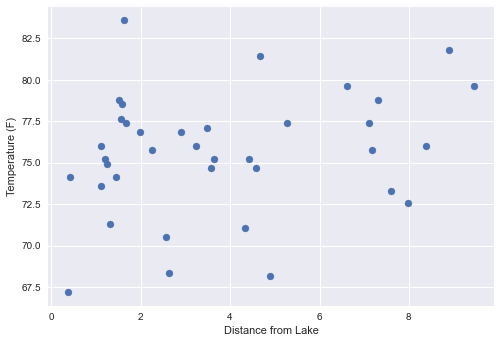

In [32]:
plt.scatter(distance_temps['lake_distance'], distance_temps['Temperature_F'])
plt.xlabel('Distance from Lake')
plt.ylabel('Temperature (F)')

It looks like there might be a correlation. We can perform a linear regression using Seaborn,

<AxesSubplot:xlabel='lake_distance', ylabel='Temperature_F'>

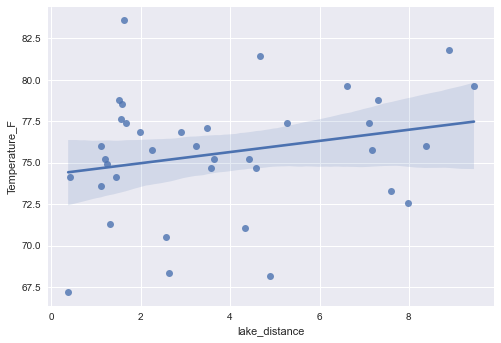

In [33]:
sns.regplot(x = distance_temps['lake_distance'], y = distance_temps['Temperature_F'])

#### 4. Apply Statistics

In [34]:
scipy.stats.linregress(distance_temps['lake_distance'], distance_temps['Temperature_F'])

LinregressResult(slope=0.3362580718666923, intercept=74.29205860592428, rvalue=0.24435557144772155, pvalue=0.14496696143883064, stderr=0.22555239406675473, intercept_stderr=1.0447666073505386)

The ***p value*** is the probability that that the pattern we are seeing is due to random chance. In other words, there is no statistically significant relationship between temperature and distance from the lake. Depending on the study, researchers generally are looking for a p value less than 0.05.

Here, the p value is about 0.14, suggesting that there is not evidence here that there is a relationship between temperature and distance from the lake. This does not mean that there isn't a relationship. It's just the data we have here is not sufficicient to make that claim.